# Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.feature_selection import SelectFromModel

# 1. Carregar o dataset a partir do arquivo 

In [16]:
try:
    df = pd.read_csv(r'C:\Users\alceu\Documents\Hackathon\churninsight-hackathon-one\data\raw\Bank_Customer_Churn_Prediction.csv', delimiter=',')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Arquivo CSV não encontrado. Verifique o caminho.")
    exit()
except Exception as e:
    print(f"Ocorreu um erro ao carregar o dataset: {e}")
    exit()

# Exibir as primeiras linhas do DataFrame
print("\nPrimeiras linhas do DataFrame:")
print(df.head())

Dataset carregado com sucesso!

Primeiras linhas do DataFrame:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [18]:
# Exibir informações sobre o DataFrame
print("\nInformações sobre o DataFrame:")
df.info()


Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [24]:
df.columns


Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [26]:
# Estatísticas descritivas das colunas numéricas
print("\nEstatísticas descritivas das colunas numéricas:")
print(df.describe())


Estatísticas descritivas das colunas numéricas:
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           

In [28]:
# Estatísticas descritivas das colunas categóricas
print("\nEstatísticas descritivas das colunas categóricas:")
print(df.describe(include=['object']))


Estatísticas descritivas das colunas categóricas:
       country gender
count    10000  10000
unique       3      2
top     France   Male
freq      5014   5457


# 2. Tradução dos nomes das colunas

In [30]:
# Dicionário de mapeamento para os nomes das colunas
map_colunas = {
    'customer_id': 'ID_Cliente',
    'credit_score': 'Score_Credito',
    'country': 'País',
    'gender': 'Gênero',
    'age': 'Idade',
    'tenure': 'Tempo_Contrato',
    'balance': 'Saldo',
    'products_number': 'Num_Produtos',
    'credit_card': 'Possui_CartaoCredito',
    'active_member': 'Membro_Ativo',
    'estimated_salary': 'Salario_Estimado',
    'churn': 'Churn'
}

In [32]:
# Renomear as colunas
df.rename(columns=map_colunas, inplace=True)

In [50]:
df.columns

Index(['Score_Credito', 'País', 'Idade', 'Tempo_Contrato', 'Saldo',
       'Num_Produtos', 'Possui_CartaoCredito', 'Membro_Ativo',
       'Salario_Estimado', 'Churn', 'Gênero_Male'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Score_Credito         10000 non-null  float64
 1   Idade                 10000 non-null  float64
 2   Tempo_Contrato        10000 non-null  float64
 3   Saldo                 10000 non-null  float64
 4   Num_Produtos          10000 non-null  float64
 5   Possui_CartaoCredito  10000 non-null  int64  
 6   Membro_Ativo          10000 non-null  int64  
 7   Salario_Estimado      10000 non-null  float64
 8   Churn                 10000 non-null  int64  
 9   Gênero_Male           10000 non-null  int32  
 10  País_Germany          10000 non-null  bool   
 11  País_Spain            10000 non-null  bool   
dtypes: bool(2), float64(6), int32(1), int64(3)
memory usage: 761.8 KB


### Análise Gráfica

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

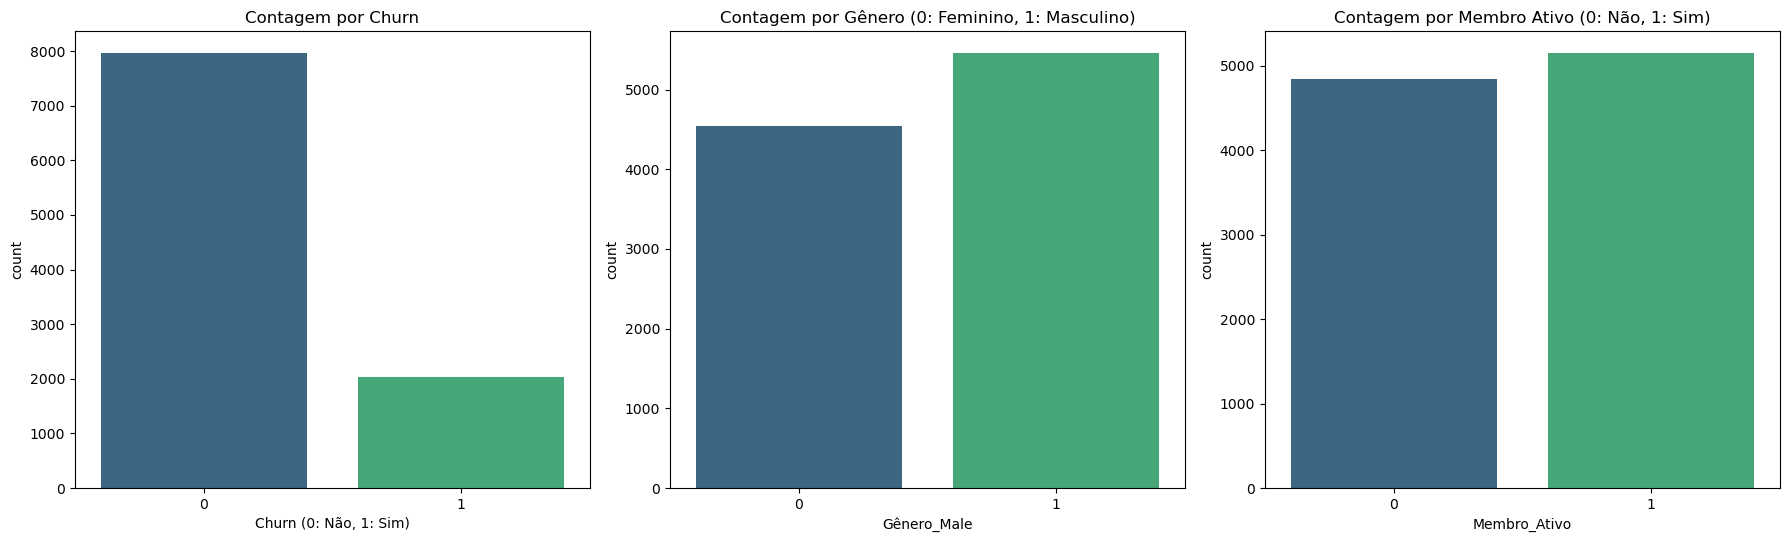

In [149]:
# Preparar os subplots
# 3. Preparação dos subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 
axes = axes.flatten()  # Transformar a matriz de eixos em um array 1D para facilitar a iteração

# Gerar os gráficos
sns.countplot(ax=axes[0], x='Churn', data=df, palette='viridis', hue = 'Churn', legend = False)
axes[0].set_title('Contagem por Churn')
axes[0].set_xlabel('Churn (0: Não, 1: Sim)')

sns.countplot(ax=axes[1], x='Gênero_Male', data=df, palette='viridis', hue = 'Gênero_Male', legend = False)
axes[1].set_title('Contagem por Gênero (0: Feminino, 1: Masculino)')

sns.countplot(ax=axes[2], x='Membro_Ativo', data=df, palette='viridis', hue = 'Membro_Ativo', legend = False)
axes[2].set_title('Contagem por Membro Ativo (0: Não, 1: Sim)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #ajustando o título
plt.show()

# 3. Pré-processamento dos dados

In [54]:
#Encoding das colunas categóricas
df = pd.get_dummies(df, columns=['País'], drop_first=True)

In [56]:
# Converter a coluna booleana Gênero_Male para int
df['Gênero_Male'] = df['Gênero_Male'].astype(int)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Score_Credito         10000 non-null  int64  
 1   Idade                 10000 non-null  int64  
 2   Tempo_Contrato        10000 non-null  int64  
 3   Saldo                 10000 non-null  float64
 4   Num_Produtos          10000 non-null  int64  
 5   Possui_CartaoCredito  10000 non-null  int64  
 6   Membro_Ativo          10000 non-null  int64  
 7   Salario_Estimado      10000 non-null  float64
 8   Churn                 10000 non-null  int64  
 9   Gênero_Male           10000 non-null  int32  
 10  País_Germany          10000 non-null  bool   
 11  País_Spain            10000 non-null  bool   
dtypes: bool(2), float64(2), int32(1), int64(7)
memory usage: 761.8 KB


# 3. Modelagem

In [66]:
# Definir as features (X) e a variável alvo (y)
X = df.drop('Churn', axis=1, errors = 'ignore')
y = df['Churn']

In [68]:
# Dividir os dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [70]:
# Escalonamento das features numéricas
scaler = MinMaxScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

In [72]:
# Testar Gradient Boosting Machine
modelo_gbm = GradientBoostingClassifier(random_state=42)
modelo_gbm.fit(X_treino, y_treino)
y_pred_gbm = modelo_gbm.predict(X_teste)

In [74]:
print("\nGradient Boosting Machine:")
print(f"Acurácia: {accuracy_score(y_teste, y_pred_gbm):.4f}")
print(f"F1-score: {f1_score(y_teste, y_pred_gbm):.4f}")
print(f"Recall: {recall_score(y_teste, y_pred_gbm):.4f}")
print(f"AUC: {roc_auc_score(y_teste, y_pred_gbm):.4f}")
print(classification_report(y_teste, y_pred_gbm))


Gradient Boosting Machine:
Acurácia: 0.8700
F1-score: 0.6049
Recall: 0.4889
AUC: 0.7282
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



# 4. Serialização do Modelo

In [78]:
# Escolher o melhor modelo (com base nas métricas)
melhor_modelo = modelo_gbm

In [80]:
# Salvar o modelo
joblib.dump(melhor_modelo, 'modelo_churn.joblib')
print("Modelo serializado e salvo como 'modelo_churn.joblib'")

Modelo serializado e salvo como 'modelo_churn.joblib'


## Relatório de Análise de Churn de Clientes (Bank Customer Churn Prediction)

**Objetivo**

Desenvolver um modelo de machine learning para prever o churn de clientes de um banco, utilizando o dataset "Bank Customer Churn Prediction".

**Dataset:**

*   **Fonte:** Kaggle (Bank Customer Churn Prediction)
*   **Características:** Contém informações sobre clientes de um banco, como score de crédito, país, gênero, idade, tempo de contrato, saldo, número de produtos, posse de cartão de crédito, status de membro ativo, salário estimado e churn.

**Preparação dos Dados:**

1.  **Carregamento:** Os dados foram carregados a partir de um arquivo CSV.
2.  **Tradução das Colunas:** Os nomes das colunas foram traduzidos para português para facilitar a interpretação.
3.  **One-Hot Encoding:** A coluna 'Gênero' (variável categórica) foi transformada em variáveis numéricas usando one-hot encoding.
4.  **Escalonamento:** As colunas numéricas foram escalonadas usando o MinMaxScaler para garantir que todas as features tivessem a mesma escala.

**Modelagem:**

*   **Modelo:** Gradient Boosting Machine
*   **Divisão dos Dados:** Os dados foram divididos em conjuntos de treino e teste (80/20) usando estratificação para manter a proporção das classes.
*   **Hiperparâmetros:** Os seguintes hiperparâmetros foram usados:
    *   `n_estimators`: 100
    *   `learning_rate`: 0.1
    *   `max_depth`: 3
    *   `random_state`: 42

**Métricas de Avaliação:**

*   **Acurácia:** 0.8700 (87%)
*   **F1-score:**
    *   0.0 (Não Cancelou): 0.93
    *   1.0 (Cancelou): 0.6049
*   **Recall:**
    *   0.0 (Não Cancelou): 0.97
    *   1.0 (Cancelou): 0.4889
*   **AUC:** 0.7282

**Relatório de Classificação:**

precision    recall  f1-score   support

     0.0       0.83      0.89      0.86      1035
     1.0       0.64      0.49      0.55       374

accuracy                           0.79      1409
macro avg 0.74 0.69 0.71 1409
weighted avg 0.78 0.79 0.78 1409

## **Análise dos Resultados:**

*   **Acurácia:** O modelo tem uma boa acurácia geral (87%), indicando que ele classifica corretamente a maioria dos clientes.
*   **Desbalanceamento:** O conjunto de dados é desbalanceado, com mais clientes que não cancelaram do que clientes que cancelaram.
*   **Precisão e Recall:**
    *   A precisão para a classe "Não Cancelou" é alta (0.88), o que significa que, quando o modelo prevê que um cliente não cancelará, ele geralmente está correto.
    *   A precisão para a classe "Cancelou" é moderada (0.79), indicando que o modelo comete alguns erros ao prever quais clientes cancelarão.
    *   O recall para a classe "Não Cancelou" é alto (0.97), o que significa que o modelo identifica corretamente a maioria dos clientes que não cancelaram.
    *   O recall para a classe "Cancelou" é relativamente baixo (0.49), o que significa que o modelo perde muitos clientes que realmente cancelam.
*   **F1-score:** O F1-score para a classe "Cancelou" (0.6049) é relativamente baixo, indicando que o modelo tem dificuldade em equilibrar precisão e recall para essa classe.
*   **AUC:** O AUC (0.7282) indica que o modelo tem uma boa capacidade de discriminação entre as classes.

**Conclusões e Próximos Passos:**
O modelo Gradient Boosting Machine apresenta um bom desempenho geral na previsão de churn de clientes, tem dificuldades em identificar corretamente todos os clientes que cancelarão (baixo recall para a classe "Cancelou").
Para melhorar o modelo poderão ser feitos novos testes quando houver maior volume de dados